<a href="https://colab.research.google.com/github/ajaidevanath/Segment-Anything/blob/main/Ajai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python pycocotools matplotlib onnxruntime onnx

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-1413w3m7
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-1413w3m7
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="/content/drive/MyDrive/SAM/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

In [ ]:
path = "/content/drive/MyDrive/mtech/Deep_Learning/FACULTY_NOTEBOOKS/Senthil notebooks/hummingbird.jpg"

In [ ]:
import cv2
import numpy as np
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
predictor.set_image(img)
masks, a, b = predictor.predict(
    point_coords=None,
    point_labels=None,
    multimask_output=False,
)

In [ ]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="/content/drive/MyDrive/SAM/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
sam_result = mask_generator.generate(img)

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


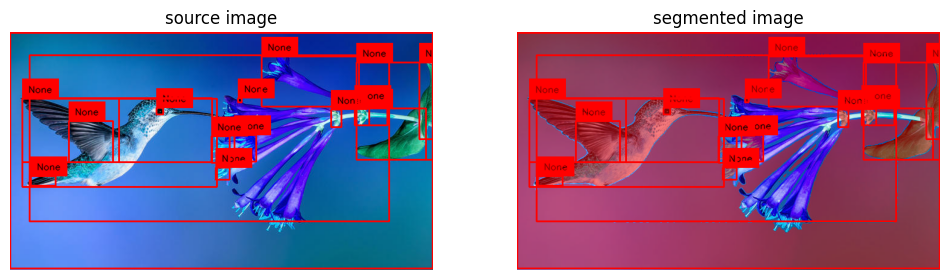

In [ ]:
import supervision as sv
import numpy as np
import matplotlib.pyplot as plt
box_annotator = sv.BoxAnnotator(color=sv.Color.RED)
mask_annotator = sv.MaskAnnotator(color=sv.Color.RED, color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

source_image = box_annotator.annotate(scene=img, detections=detections, skip_label=True)
segmented_image = mask_annotator.annotate(scene=img, detections=detections)

sv.plot_images_grid(
    images=[source_image, segmented_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [ ]:
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 3.1 MB/s eta 0:00:00
